# Метод ближайших соседей

## Импорт библиотек, установка константных значений

In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

from matplotlib import pyplot as plt

In [2]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

## Практика

Применим KNN к датасету с изображениями цифр. Это данные для 10-классовой классификации.

Загрузим данные и посмотрим на них.

In [3]:
data = load_digits()
X = data.images
y = data.target

X.shape

(1797, 8, 8)

In [8]:
X.shape[0]

1797

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
# Задаем размеры трехмерного массива
depth = 2
rows = 4
cols = 5

# Генерируем трехмерный массив с случайными значениями от 0 до 255
three_d_array = np.random.randint(0, 256, size=(depth, rows, cols))

print(three_d_array)

[[[188   9 129  41 230]
  [126 134 136  81 211]
  [ 71 175  52 156  19]
  [ 94  66  58   7 118]]

 [[ 70 108 250 201  81]
  [142 164  31  96 244]
  [236  89  67 247 228]
  [255 150 219 174 104]]]


In [17]:
three_d_array.shape

(2, 4, 5)

In [22]:
ф = three_d_array.reshape(three_d_array.shape[0], -1)

In [23]:
ф

array([[188,   9, 129,  41, 230, 126, 134, 136,  81, 211,  71, 175,  52,
        156,  19,  94,  66,  58,   7, 118],
       [ 70, 108, 250, 201,  81, 142, 164,  31,  96, 244, 236,  89,  67,
        247, 228, 255, 150, 219, 174, 104]])

In [20]:
ф.shape

(2, 20)

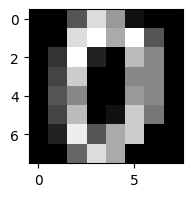

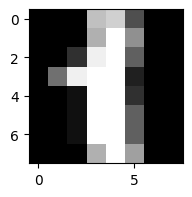

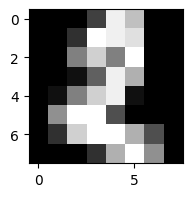

In [6]:
for i in range(3):
  plt.figure(figsize=(2,2))
  plt.imshow(X[i], cmap='gray')
  plt.show()

Каждая картинка - это матрица чисел (яркостей пикселей). Но в стандартной постановке задач каждый объект (картинка) - это строчка своих признаков в матрице объект-признак. Поэтому вытянем каждую картинку в вектор.

In [7]:
X = X.reshape(X.shape[0], -1)

X.shape

(1797, 64)

Перемешаем данные, так как в исходном датасете числа идут друг за другом, а нам для обучения и тестирования модели нужен случайный порядок.

In [24]:
X, y = shuffle(X, y)

print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

Features shape: (1797, 64),
Target shape: (1797,)
Target samples: [4 5 6 4 9 1 9 2 0 8]


Разобъем данные на трейн и тест.

In [25]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                train_size=TRAIN_SIZE,
                                                random_state=RANDOM_STATE)

Обучим KNN с взятым из головы числом соседей (10).

In [26]:
clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(Xtrain, ytrain)
prediction = clf.predict(Xtest)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, prediction)

0.9796296296296296

Посмотрим, как число соседей влияет на качество модели.

In [33]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

In [28]:
for k in np.arange(3, 50, 2):
    clf = KNeighborsClassifier(n_neighbors=k)

    clf.fit(Xtrain, ytrain)
    prediction = clf.predict(Xtest)

    print('k:', k)
    print('accuracy:', accuracy_score(ytest, prediction))

k: 3
accuracy: 0.9833333333333333
k: 5
accuracy: 0.9814814814814815
k: 7
accuracy: 0.9851851851851852
k: 9
accuracy: 0.9814814814814815
k: 11
accuracy: 0.9796296296296296
k: 13
accuracy: 0.9796296296296296
k: 15
accuracy: 0.9777777777777777
k: 17
accuracy: 0.9722222222222222
k: 19
accuracy: 0.9740740740740741
k: 21
accuracy: 0.9666666666666667
k: 23
accuracy: 0.9666666666666667
k: 25
accuracy: 0.9629629629629629
k: 27
accuracy: 0.9648148148148148
k: 29
accuracy: 0.9629629629629629
k: 31
accuracy: 0.9611111111111111
k: 33
accuracy: 0.9574074074074074
k: 35
accuracy: 0.9518518518518518
k: 37
accuracy: 0.9481481481481482
k: 39
accuracy: 0.9462962962962963
k: 41
accuracy: 0.9462962962962963
k: 43
accuracy: 0.9444444444444444
k: 45
accuracy: 0.9425925925925925
k: 47
accuracy: 0.9407407407407408
k: 49
accuracy: 0.9407407407407408


Посмотрим, как влияет на качество алгоритма способ учесть веса у ближайших соседей.

In [34]:
for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors=3, weights=weights)

    clf.fit(Xtrain, ytrain)
    prediction = clf.predict(Xtest)

    print('weights:', weights)
    print('accuracy:', accuracy_score(ytest, prediction))

weights: uniform
accuracy: 0.9833333333333333
weights: distance
accuracy: 0.9833333333333333


Визуально оценим качество предсказаний

predicted label: 0


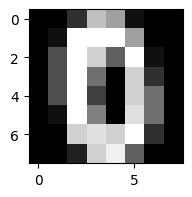

predicted label: 0


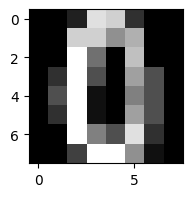

predicted label: 1


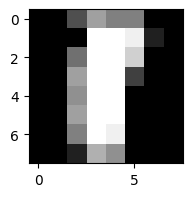

predicted label: 0


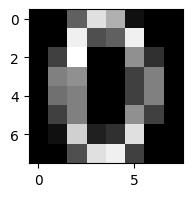

predicted label: 0


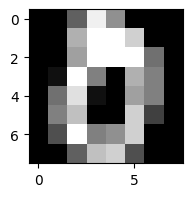

In [35]:
for i in range(5):
  print('predicted label:', prediction[i])
  plt.figure(figsize=(2,2))
  plt.imshow(Xtest[i].reshape((8,8)), cmap='gray')
  plt.show()

Мы видим, что KNN довольно хорошо справился с задачей!  
Подбор гиперпараметров (число соседей, способ подсчета весов соседей и другие) также влияет на качество предсказания модели.

true label: 5
predicted label: 9


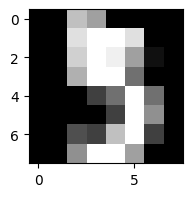

true label: 8
predicted label: 1


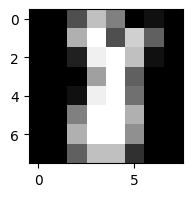

true label: 1
predicted label: 5


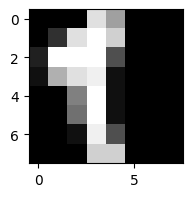

true label: 8
predicted label: 1


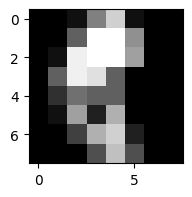

true label: 9
predicted label: 1


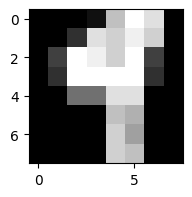

true label: 9
predicted label: 5


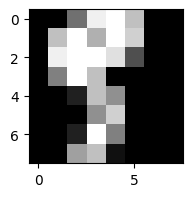

true label: 5
predicted label: 9


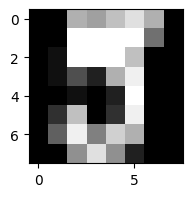

true label: 8
predicted label: 9


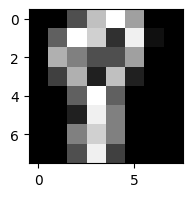

true label: 8
predicted label: 1


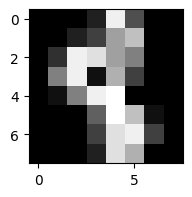

In [36]:
for i in range(len(ytest)):
   if ytest[i] != prediction[i]:
      print('true label:', ytest[i])
      print('predicted label:', prediction[i])
      plt.figure(figsize=(2,2))
      plt.imshow(Xtest[i].reshape((8,8)), cmap='gray')
      plt.show()